# Projet 5 : Segmentez des clients d'un site e-commerce

##  Import des librairies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Nous avons 9 tableaux csv :

 - olist_customers_dataset
 - olist_geolocation_dataset
 - olist_order_items_dataset
 - olist_order_payments_dataset
 - olist_order_reviews_dataset
 - olist_orders_dataset
 - olist_products_dataset
 - olist_sellers_dataset
 - product_category_name_translation

### Lecture des datasets

In [2]:
df_customers = pd.read_csv('C:/Users/Brahim/Desktop/Mes projets/Projet P5/olist_customers_dataset.csv',sep=",")
df_geolocation = pd.read_csv('C:/Users/Brahim/Desktop/Mes projets/Projet P5/olist_geolocation_dataset.csv',sep=",")
df_items = pd.read_csv('C:/Users/Brahim/Desktop/Mes projets/Projet P5/olist_order_items_dataset.csv',sep=",")
df_payments = pd.read_csv('C:/Users/Brahim/Desktop/Mes projets/Projet P5/olist_order_payments_dataset.csv',sep=",")
df_reviews = pd.read_csv('C:/Users/Brahim/Desktop/Mes projets/Projet P5/olist_order_reviews_dataset.csv',sep=",")
df_orders = pd.read_csv('C:/Users/Brahim/Desktop/Mes projets/Projet P5/olist_orders_dataset.csv',sep=",")
df_products = pd.read_csv('C:/Users/Brahim/Desktop/Mes projets/Projet P5/olist_products_dataset.csv',sep=",")
df_sellers = pd.read_csv('C:/Users/Brahim/Desktop/Mes projets/Projet P5/olist_sellers_dataset.csv',sep=",")
df_product_category = pd.read_csv('C:/Users/Brahim/Desktop/Mes projets/Projet P5/product_category_name_translation.csv',sep=",")

### Etude séparée des datasets

 ### 1.  olist_customers_dataset

In [3]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### Taille du dataset

In [5]:
print ("Le dataset {} compte {} lignes et {} variables".format("df_customers", df_customers.shape[0], df_customers.shape[1]))

Le dataset df_customers compte 99441 lignes et 5 variables


<AxesSubplot:>

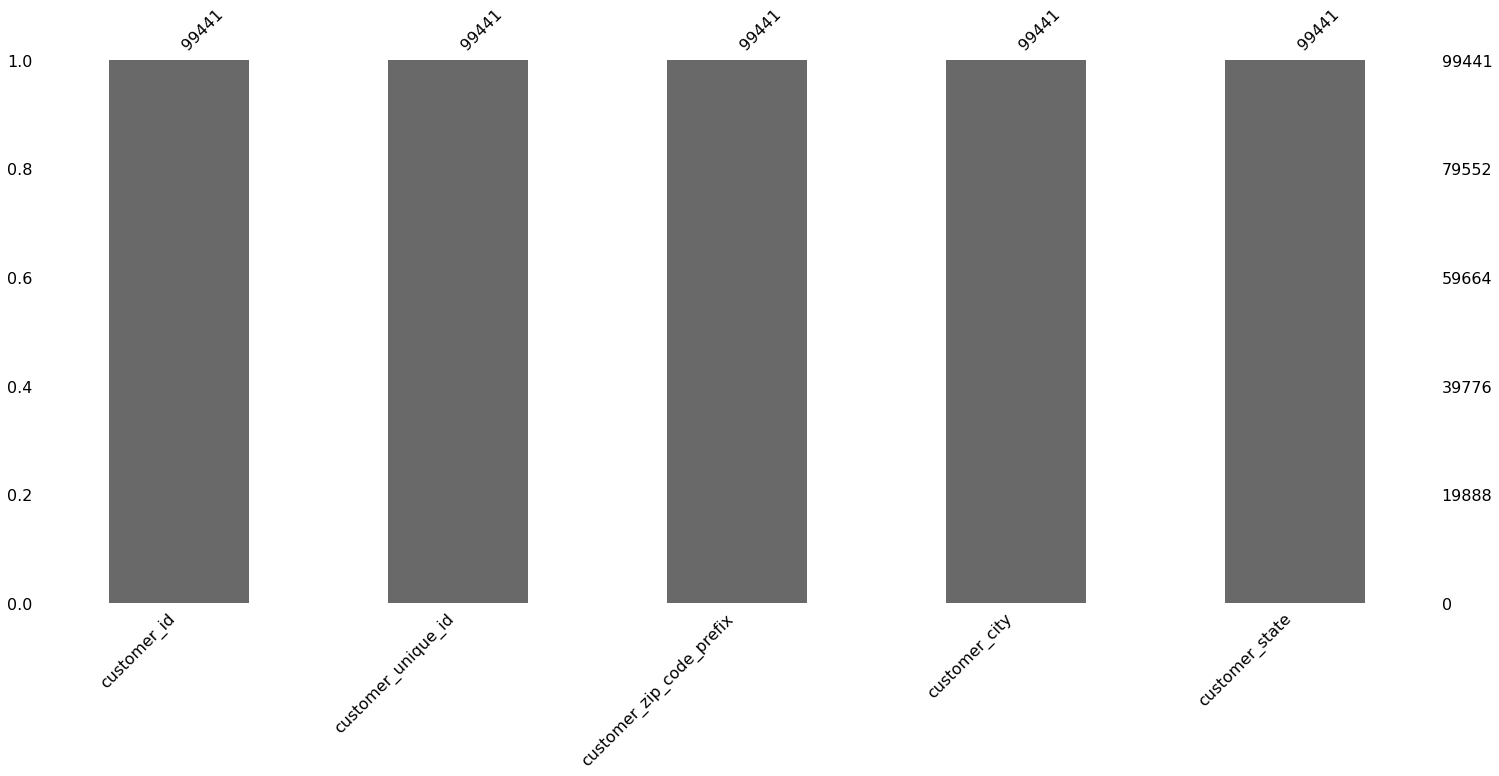

In [6]:
# Import des librairies
import missingno as msno
%matplotlib inline
msno.bar(df_customers)

#### Recherche de valeurs manquantes

In [7]:
df_customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

#### Recherche de doublons

In [8]:
if df_customers.duplicated(keep=False).any()==False:
    print("df_customers n'a pas de doublons")
else:
    print("df_customers a  des doublons")
        

df_customers.loc[df_customers.duplicated(keep= False),:]

df_customers n'a pas de doublons


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


#### Chaque commande a un identifiant unique : customer_id (c'est une clé des commandes dans le jeu de données). Chaque client possède un identifiant unique : customer_unique_id  (un mêm client peut avoir  des identifiants différents pour différentes commandes)


In [9]:
df_customers.duplicated(subset=["customer_id"], keep=False).any()            

False

In [10]:
len(df_customers["customer_id"].unique())

99441

In [11]:
df_customers.duplicated(subset=["customer_unique_id"], keep=False).any()  

True

In [12]:
df_customers.loc[df_customers["customer_unique_id"].duplicated(keep= False),:]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
13,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,sao paulo,SP
32,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,camacari,BA
33,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,resende,RJ
...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


In [13]:
len(df_customers["customer_unique_id"].unique())

96096

#### Nombre de villes et états d'où ont été faite les commandes

In [14]:
print("Nombre d'états :" , len(df_customers["customer_state"].unique()))
print("Nombre de villes :" , len(df_customers["customer_city"].unique()))

Nombre d'états : 27
Nombre de villes : 4119


#### Nombre de commandes par Etat 

In [15]:
# Exemple :  Nombre de commande faite de l'Etat SP:
df_customers[df_customers['customer_state']=="SP"].count()

customer_id                 41746
customer_unique_id          41746
customer_zip_code_prefix    41746
customer_city               41746
customer_state              41746
dtype: int64

Text(0, 0.5, 'Nombre de commandes')

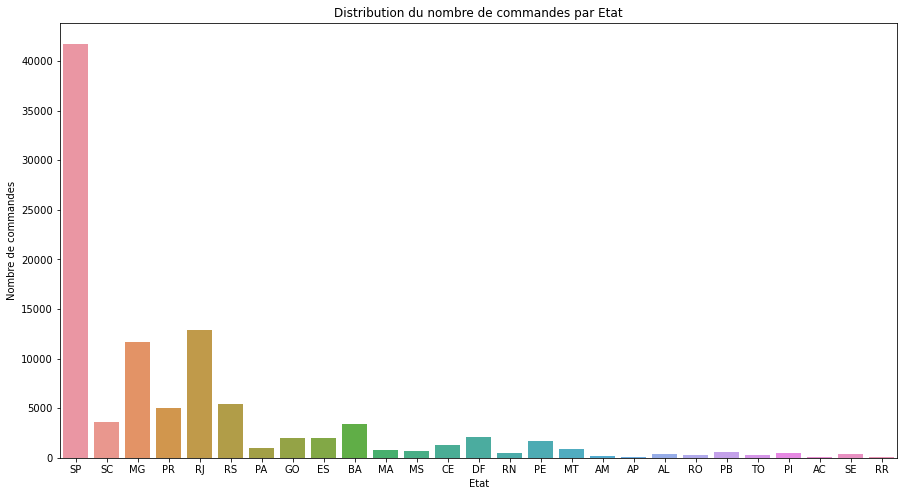

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(x='customer_state', data=df_customers)
plt.title('Distribution du nombre de commandes par Etat')
plt.xlabel('Etat')
plt.ylabel('Nombre de commandes')

### 2. olist_geolocation_dataset

In [17]:
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [18]:
len(df_geolocation["geolocation_city"].unique())

8011

<AxesSubplot:>

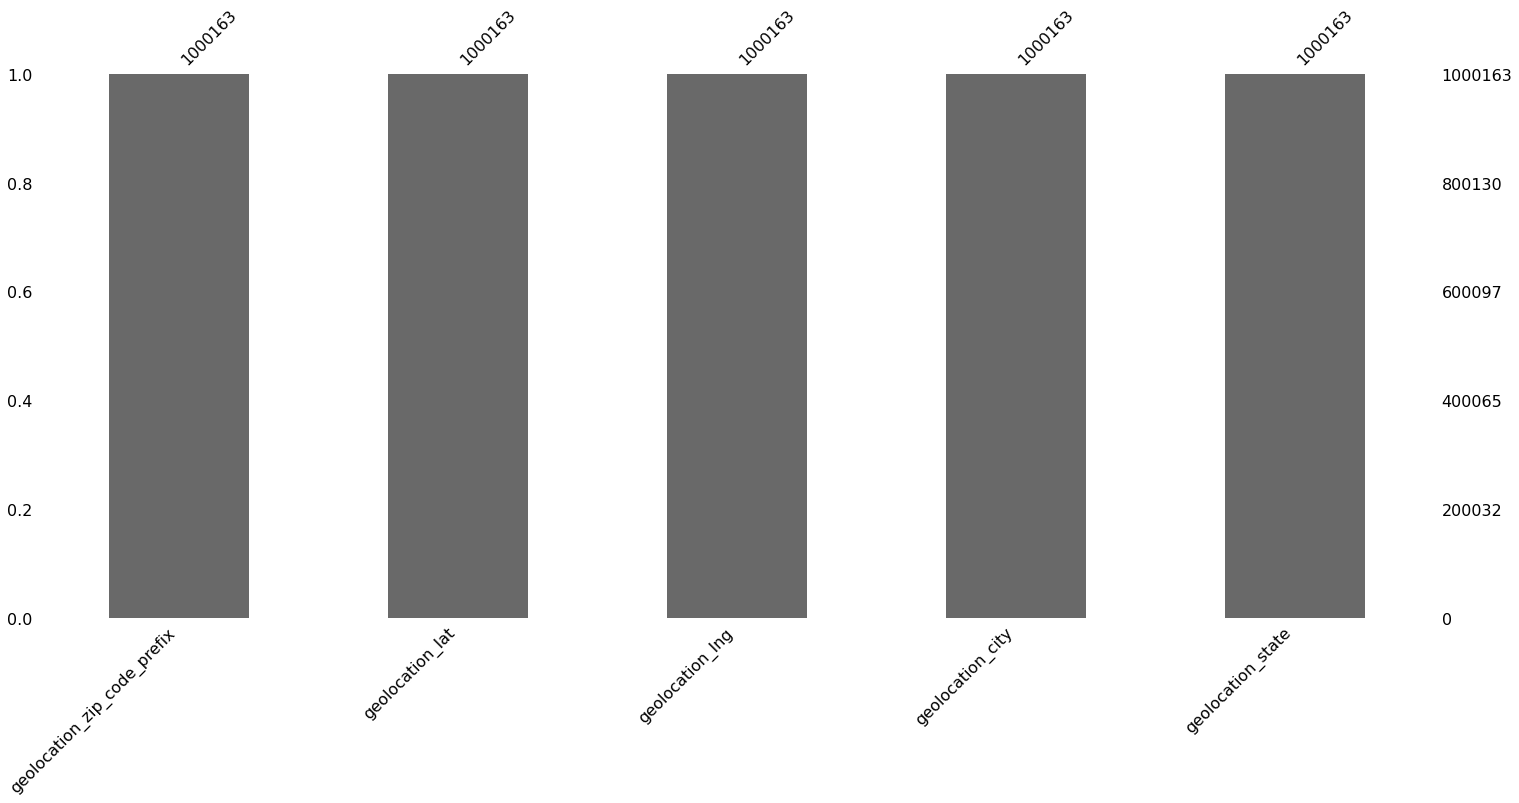

In [19]:
# Import des librairies
import missingno as msno
%matplotlib inline
msno.bar(df_geolocation)

In [20]:
df_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


<AxesSubplot:>

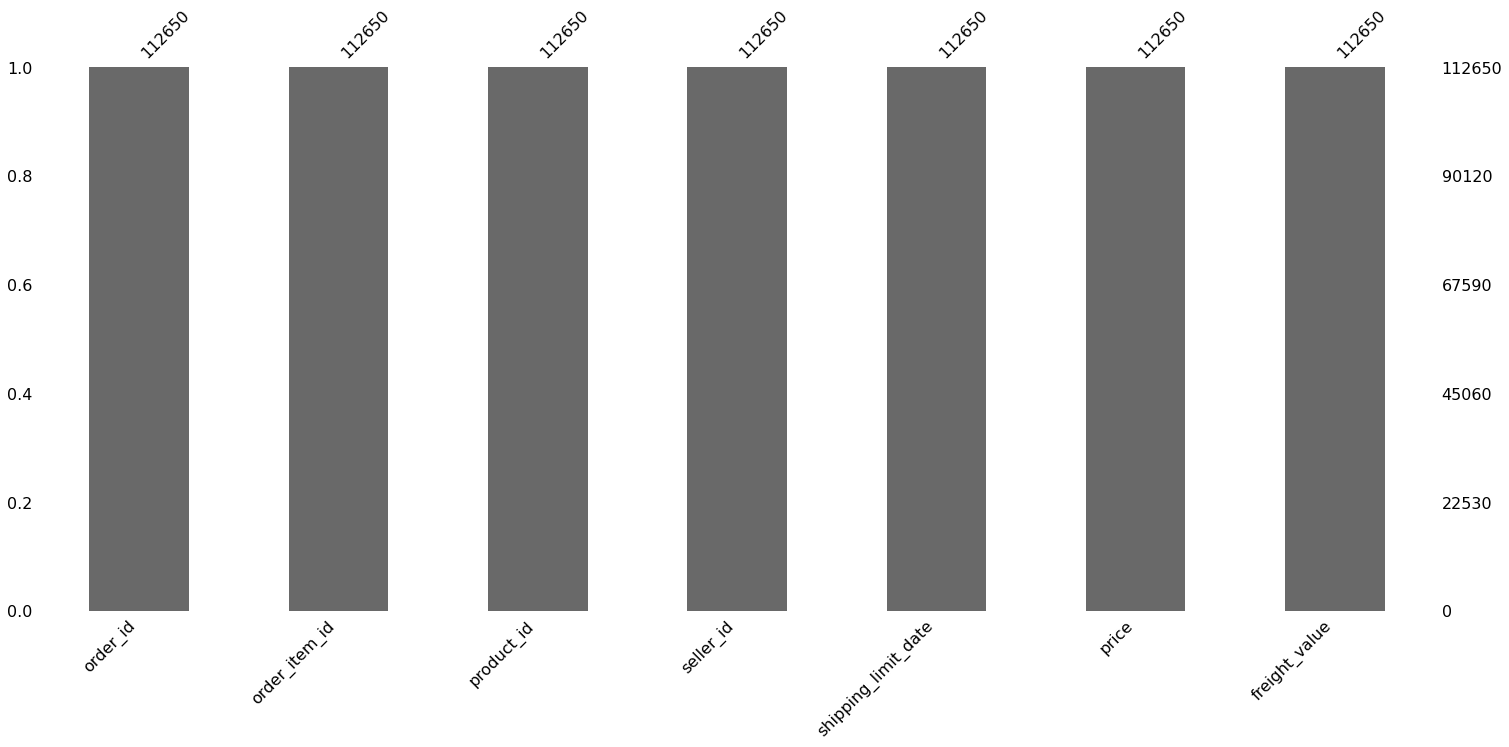

In [21]:
msno.bar(df_items)

### Distribution des prix

Text(0.5, 0, 'Prix')

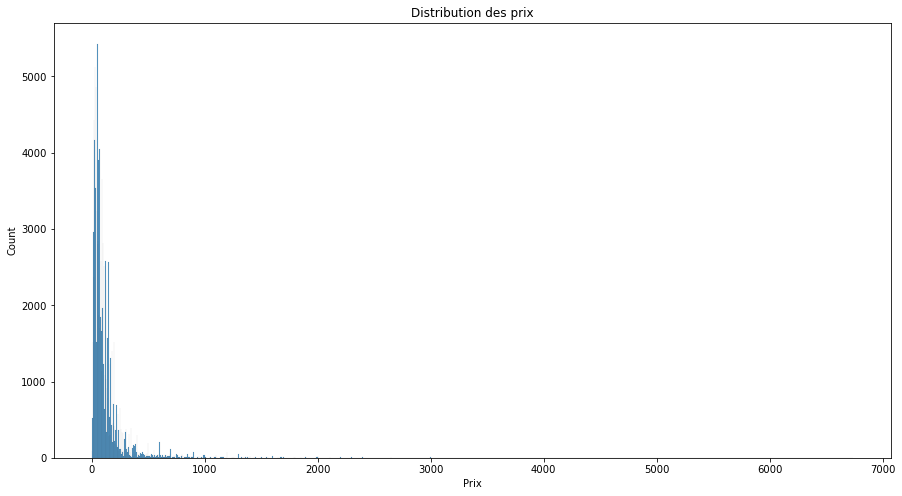

In [22]:
plt.figure(figsize=(15,8))
sns.histplot(x='price', data=df_items)
plt.title('Distribution des prix')
plt.xlabel('Prix')

Text(0.5, 0, 'Frais de livraison')

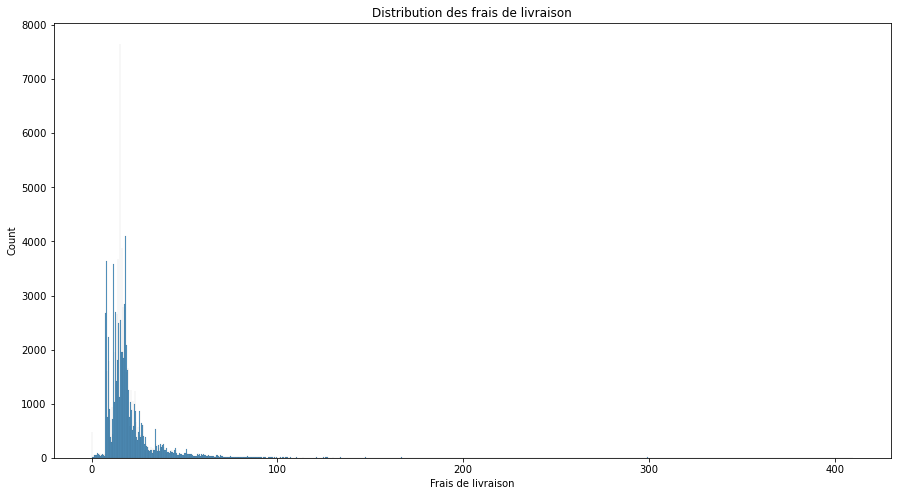

In [23]:
# plotting the distribution of freight value
plt.figure(figsize=(15,8))
sns.histplot(x='freight_value', data=df_items)
plt.title('Distribution des frais de livraison')
plt.xlabel('Frais de livraison')

In [24]:
df_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


<AxesSubplot:>

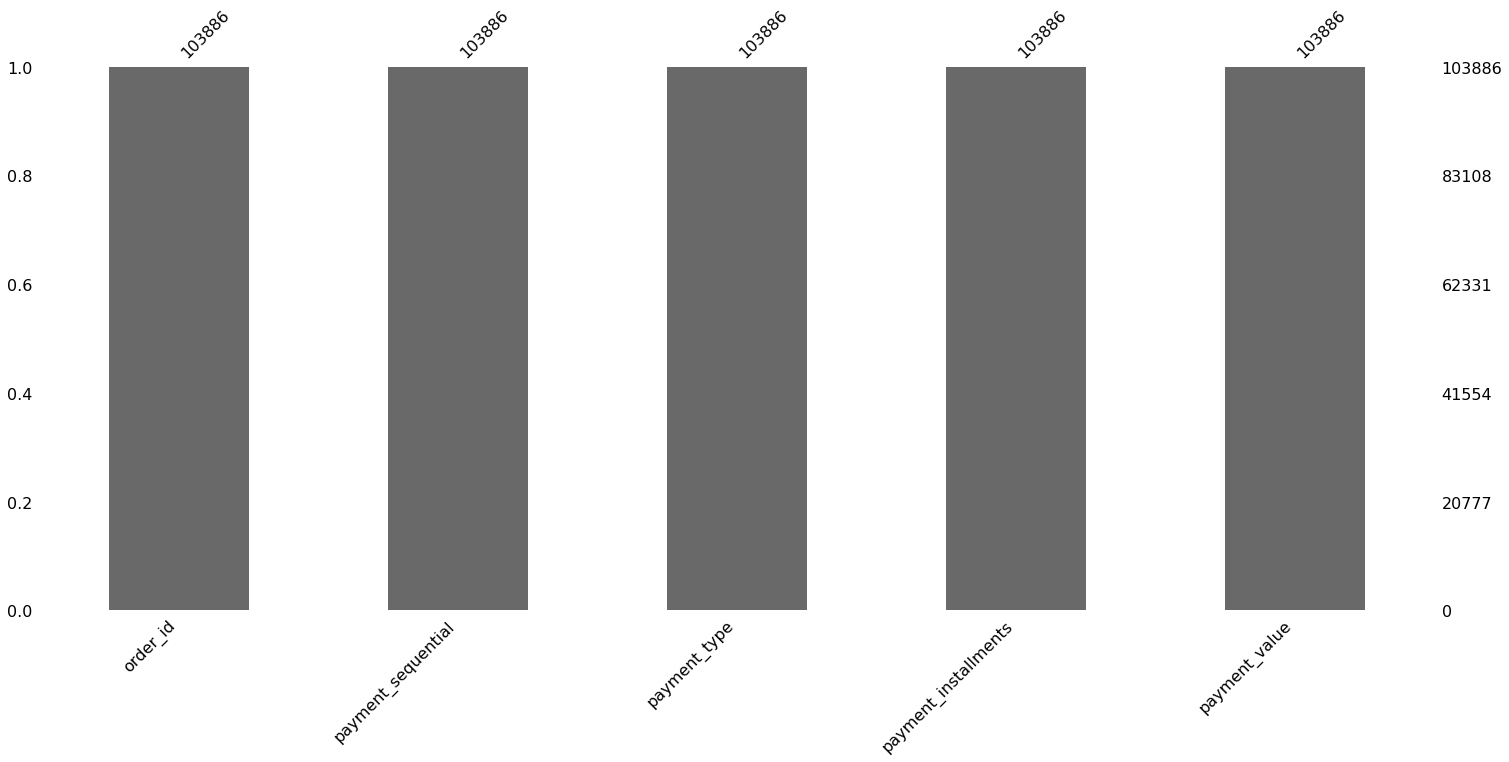

In [25]:
msno.bar(df_payments)

Text(0, 0.5, 'Nombre de clients')

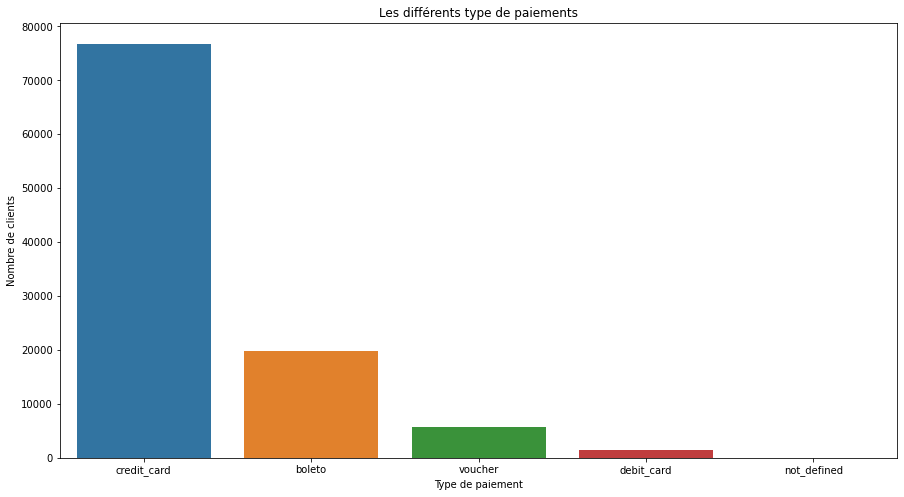

In [26]:
# analyzing the payment methods chosen by different customers
plt.figure(figsize=(15,8))
sns.countplot(x='payment_type', data=df_payments)
plt.title('Les différents type de paiements')
plt.xlabel('Type de paiement')
plt.ylabel('Nombre de clients')

Text(0, 0.5, 'Nombre de clients')

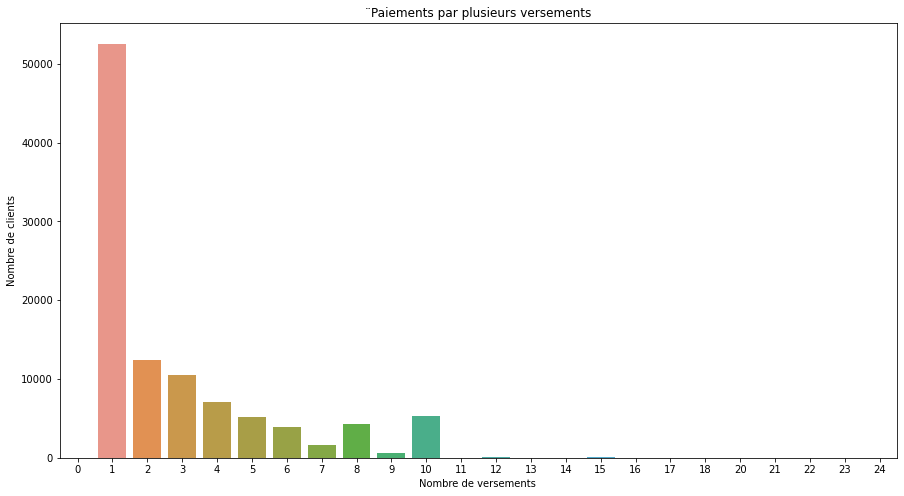

In [27]:
# plotting the distribution of number of installments
plt.figure(figsize=(15,8))
sns.countplot(x='payment_installments', data=df_payments)
plt.title('¨Paiements par plusieurs versements')
plt.xlabel('Nombre de versements ')
plt.ylabel('Nombre de clients')

<AxesSubplot:xlabel='payment_value', ylabel='Count'>

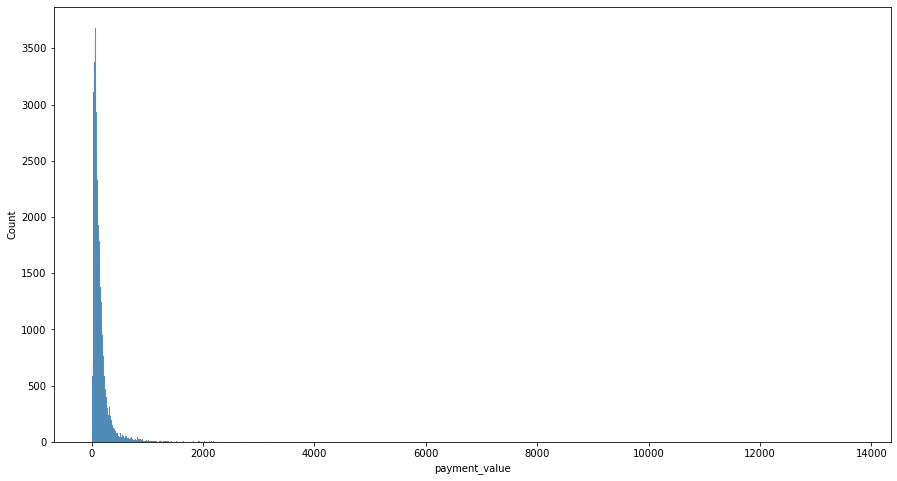

In [28]:
# plotting the distribution of payment value
plt.figure(figsize=(15,8))
sns.histplot(x='payment_value', data=df_payments)


In [29]:
df_payments[df_payments["payment_type"]=="credit_card"]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


<AxesSubplot:xlabel='payment_type', ylabel='payment_value'>

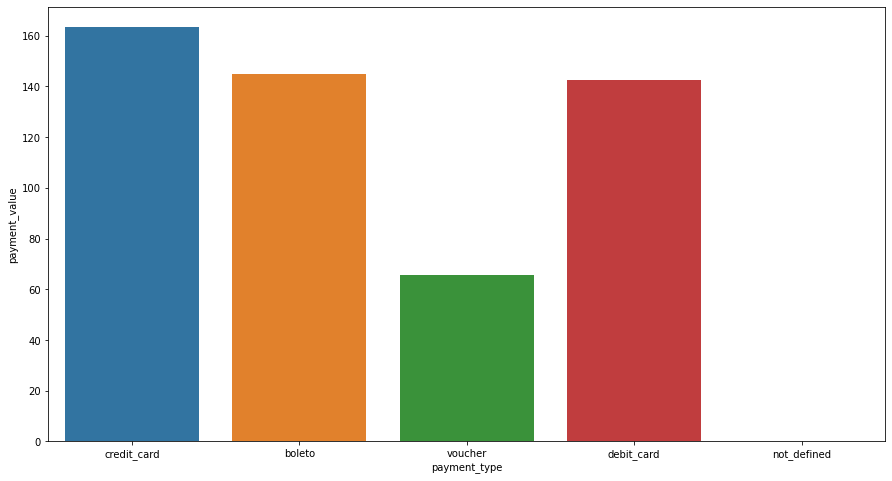

In [30]:
# Montant moyen payé avec chaque type de paiement
plt.figure(figsize=(15,8))
sns.barplot(x='payment_type', y='payment_value', data=df_payments, ci=None)


In [31]:
df_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


<AxesSubplot:xlabel='review_score', ylabel='count'>

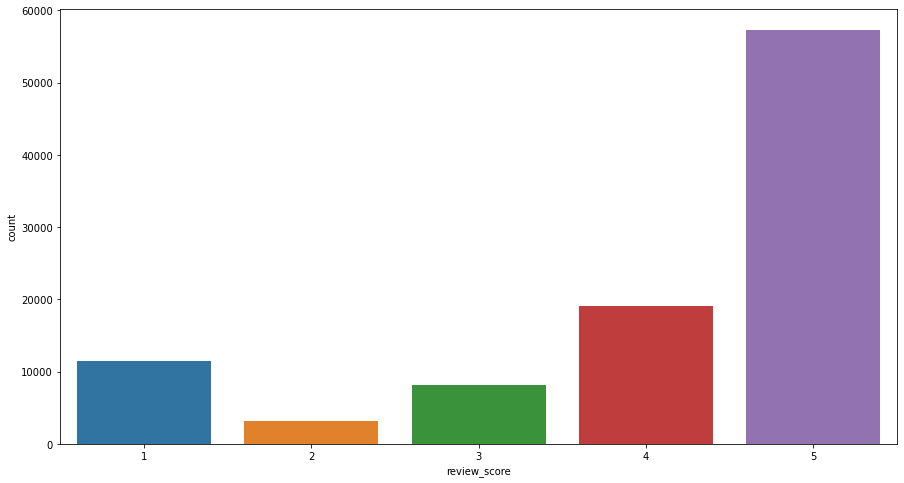

In [32]:
# Score donné
plt.figure(figsize=(15,8))
sns.countplot(x='review_score', data=df_reviews)


<AxesSubplot:>

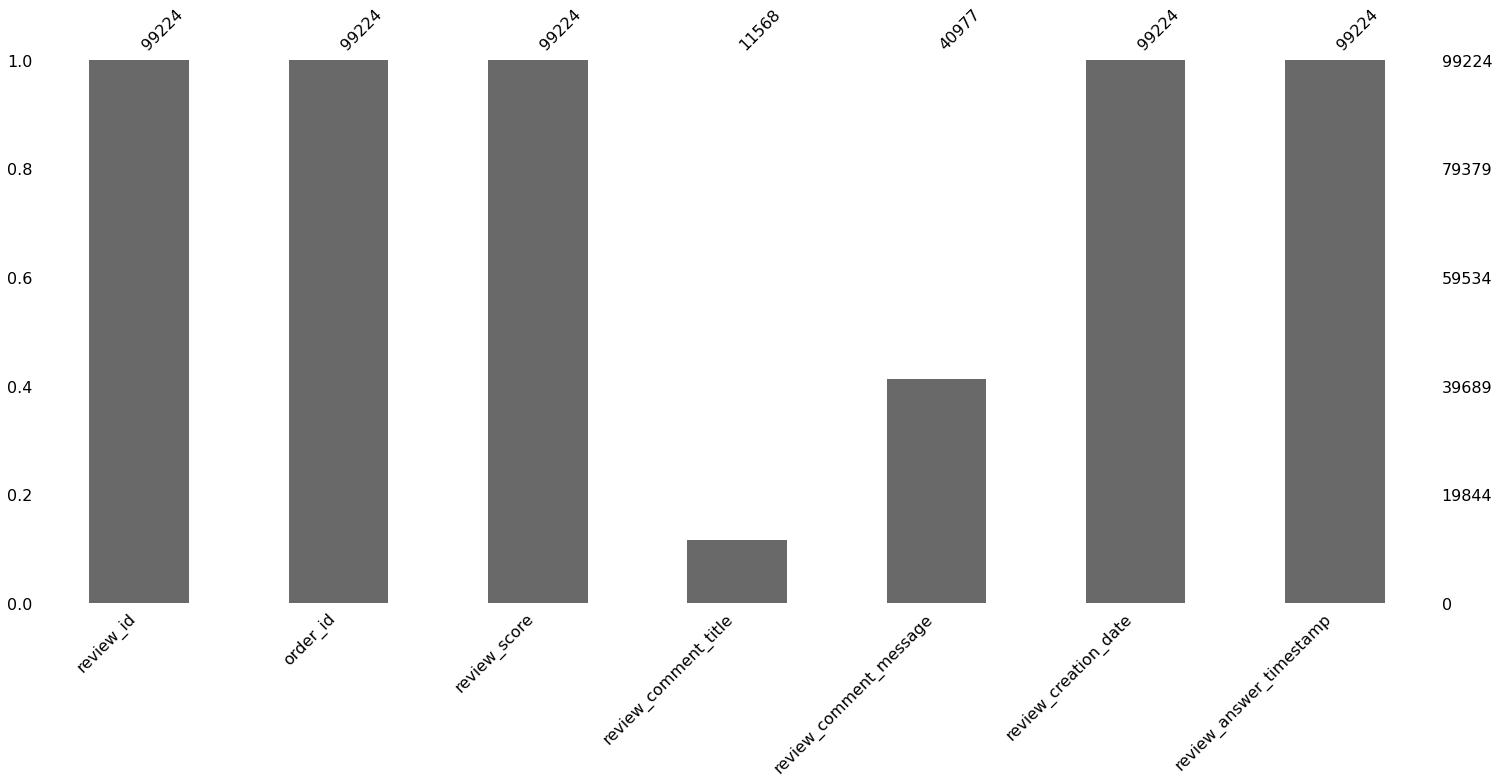

In [33]:
msno.bar(df_reviews)

In [34]:
# Suppression de colonnes avec des valeurs manquantes
df_reviews = df_reviews.drop(columns=['review_comment_title', 'review_comment_message'])

In [35]:
df_orders 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [36]:
df_orders["order_status"].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

#### Dans notre étude, on va uniquement prendre en considération les  commandes livreés 

In [37]:
df_orders_new = df_orders[df_orders["order_status"]=='delivered']
df_orders_new

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [38]:
df_products 

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


<AxesSubplot:>

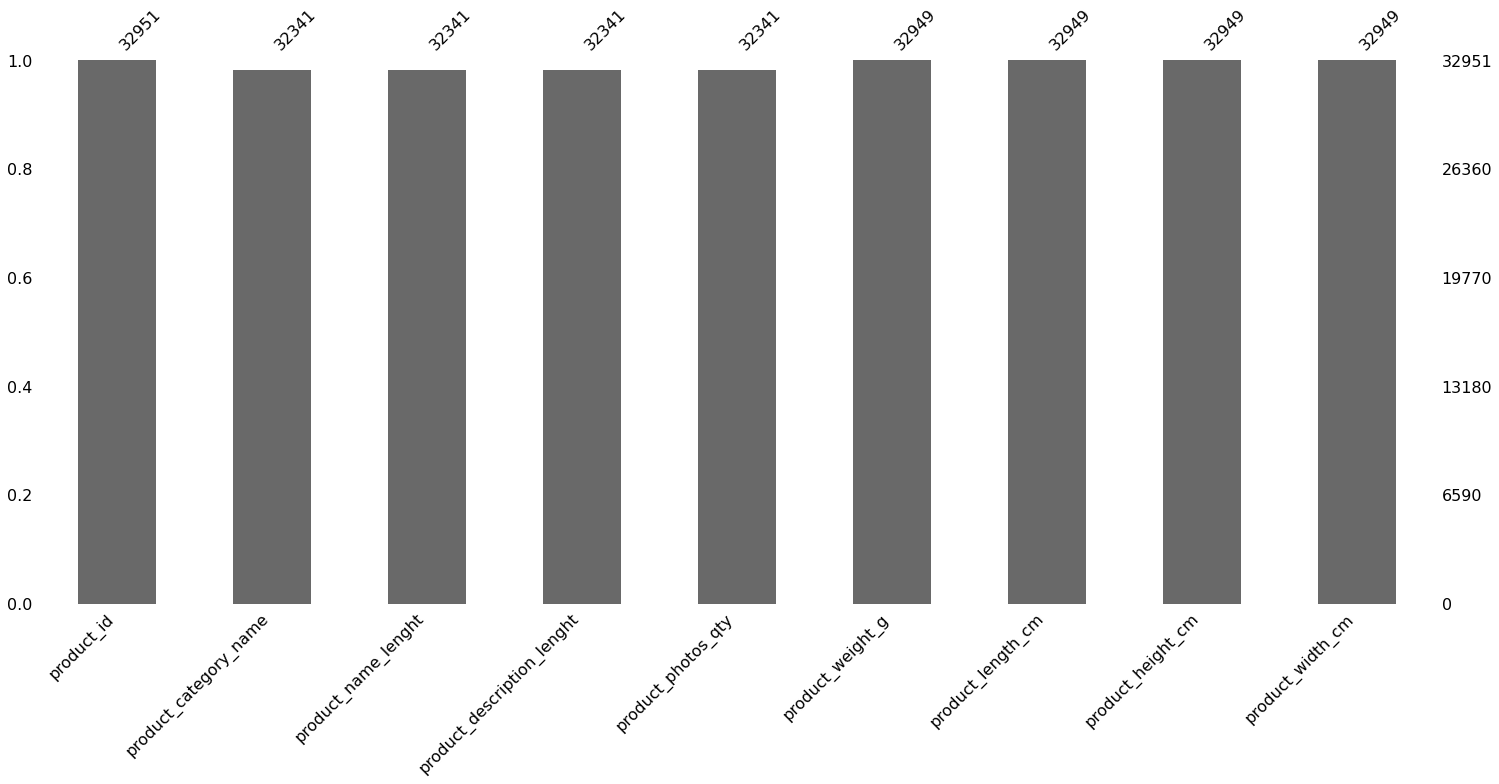

In [39]:
msno.bar(df_products)

In [40]:
df_product_category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


#### Le dataset  df_product_category va nous permettre de changer la colonne  "product_category_name" du dataset  df_product pour avoir le nom des catégories en anglais. 

In [41]:
df_products_new = pd.merge(df_products, df_product_category,
                    how="left",
                    on="product_category_name")

In [42]:
df_products_new

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [43]:
df_products_new[["product_category_name", "product_category_name_english"]]

,product_category_name,product_category_name_english
0,perfumaria,perfumery
1,artes,art
2,esporte_lazer,sports_leisure
3,bebes,baby
4,utilidades_domesticas,housewares
...,...,...
32946,moveis_decoracao,furniture_decor
32947,construcao_ferramentas_iluminacao,construction_tools_lights
32948,cama_mesa_banho,bed_bath_table
32949,informatica_acessorios,computers_accessories


#### Suppression de la colonne "product_category_name

In [44]:
df_products_new.drop("product_category_name", axis=1, inplace=True)

#### On renomme la colonne "product_category_name" en "product_category_name"

In [45]:
df_products_new = df_products_new.rename(columns={"product_category_name_english":
                                    "product_category_name"})

<AxesSubplot:>

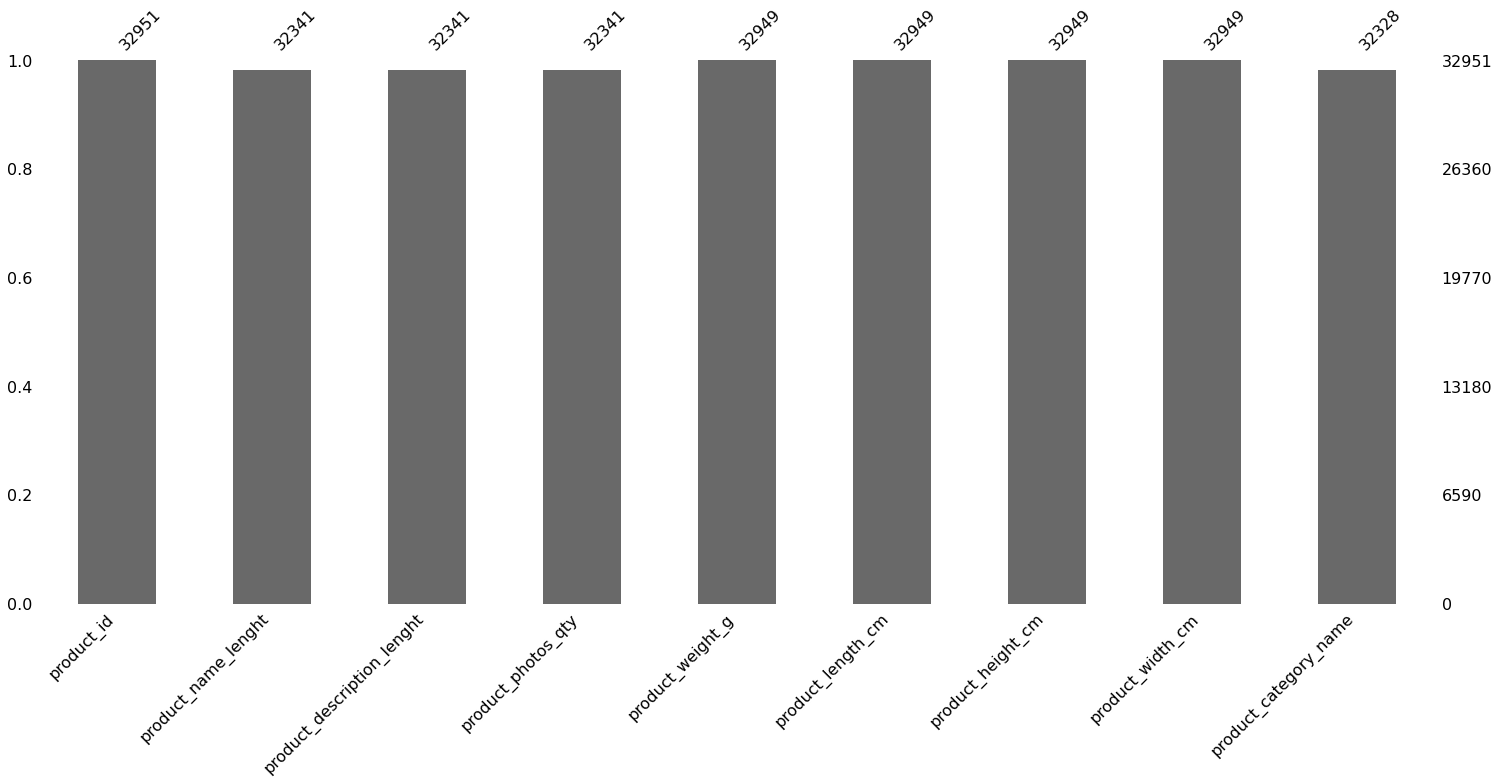

In [46]:
msno.bar(df_products_new)

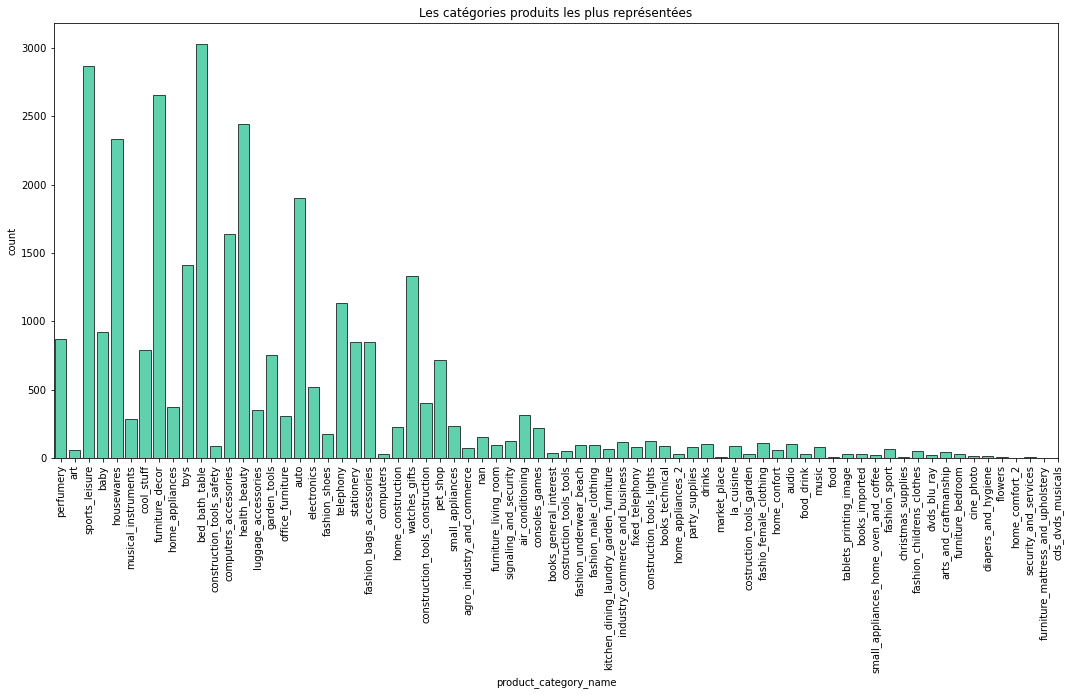

In [47]:
fig = plt.figure(figsize=(18, 8))
sns.countplot(data=df_products_new, x="product_category_name",
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.xticks(range(0, df_products_new["product_category_name"].nunique()+1),
           df_products_new["product_category_name"].unique(),
           rotation=90)
plt.title("Les catégories produits les plus représentées")
plt.show()


In [48]:
df_sellers 

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


<AxesSubplot:>

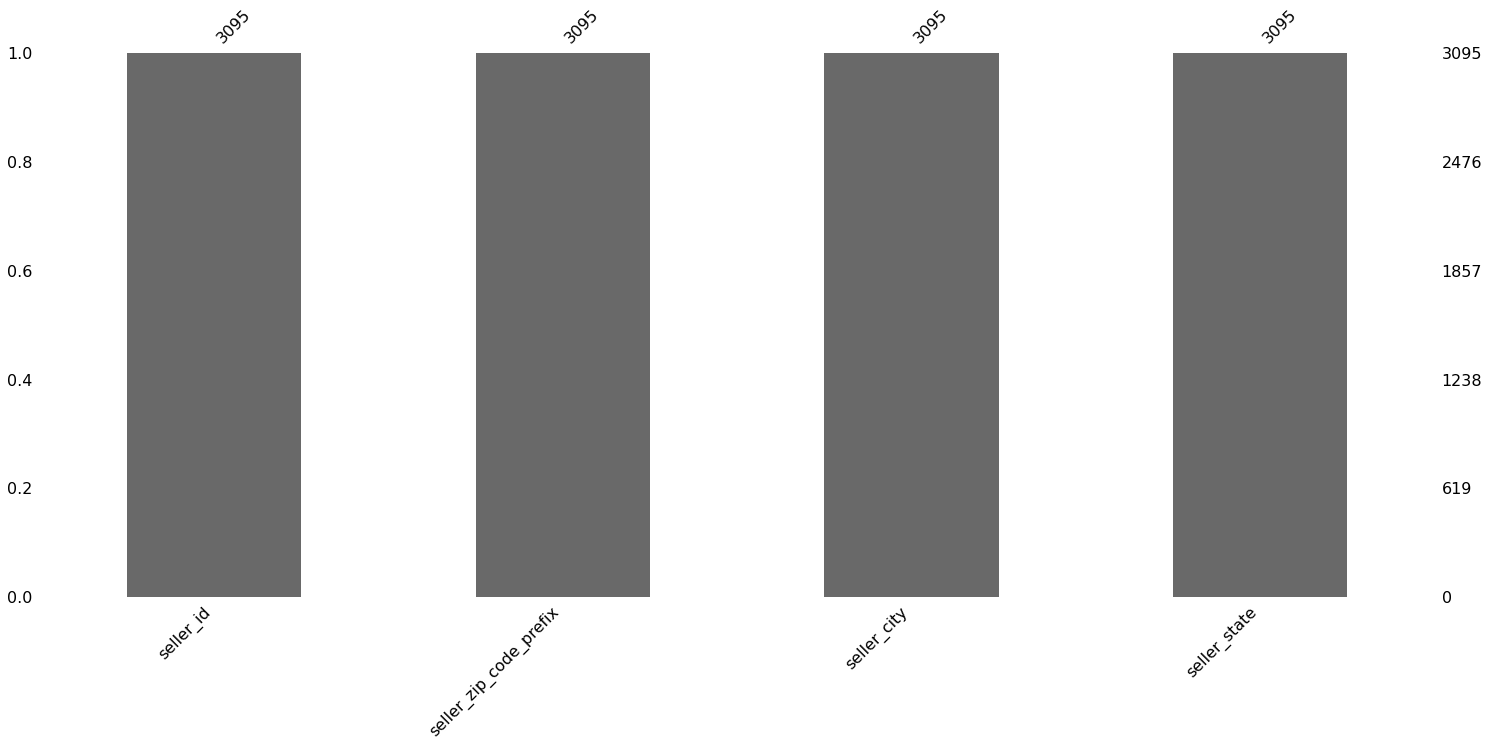

In [49]:
msno.bar(df_sellers)

In [50]:
df_product_category

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


<AxesSubplot:>

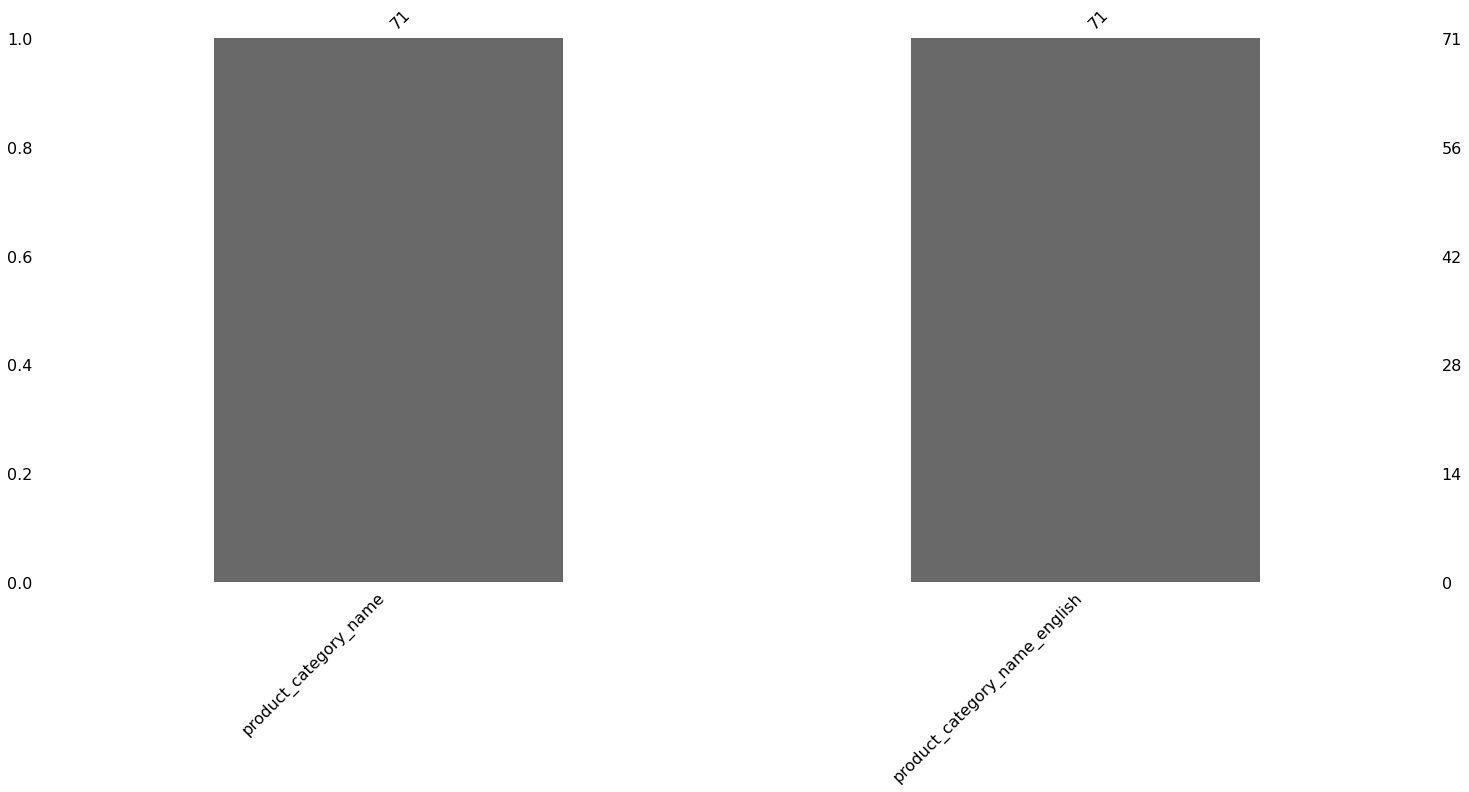

In [51]:
msno.bar(df_product_category)

In [52]:
df_customers 
df_geolocation
df_items
df_payments
df_reviews 
df_orders_new 
df_products_new 
df_sellers 

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [53]:
df = pd.merge(df_orders_new,df_payments, on='order_id', how='inner')

In [54]:
df = df.merge(df_reviews, on='order_id', how='inner')

In [55]:
df = df.merge(df_customers, on='customer_id', how='inner')

In [56]:
df = df.merge(df_items, on='order_id', how='inner')

In [57]:
df = df.merge(df_products_new, on='product_id', how='inner')

In [58]:
df = df.merge(df_geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

In [59]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,500.0,19.0,8.0,13.0,housewares,3149,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,500.0,19.0,8.0,13.0,housewares,3149,-23.578333,-46.587123,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,500.0,19.0,8.0,13.0,housewares,3149,-23.574809,-46.587471,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,500.0,19.0,8.0,13.0,housewares,3149,-23.575033,-46.587451,sao paulo,SP
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,500.0,19.0,8.0,13.0,housewares,3149,-23.580054,-46.586673,sao paulo,SP


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17567569 entries, 0 to 17567568
Data columns (total 39 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       object 
 1   customer_id                    object 
 2   order_status                   object 
 3   order_purchase_timestamp       object 
 4   order_approved_at              object 
 5   order_delivered_carrier_date   object 
 6   order_delivered_customer_date  object 
 7   order_estimated_delivery_date  object 
 8   payment_sequential             int64  
 9   payment_type                   object 
 10  payment_installments           int64  
 11  payment_value                  float64
 12  review_id                      object 
 13  review_score                   int64  
 14  review_creation_date           object 
 15  review_answer_timestamp        object 
 16  customer_unique_id             object 
 17  customer_zip_code_prefix       int64  
 18  

### Dans notre étude, le raisonnement doit se faire sur les identifiants clients uniques "customer_unique_id"

In [61]:
# Modification du format de la date et de l'heure
datetime_cols = ["order_purchase_timestamp", "order_delivered_customer_date"]
for col in datetime_cols:
    df[col] = df[col].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17567569 entries, 0 to 17567568
Data columns (total 39 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_id                       object        
 1   customer_id                    object        
 2   order_status                   object        
 3   order_purchase_timestamp       datetime64[ns]
 4   order_approved_at              object        
 5   order_delivered_carrier_date   object        
 6   order_delivered_customer_date  datetime64[ns]
 7   order_estimated_delivery_date  object        
 8   payment_sequential             int64         
 9   payment_type                   object        
 10  payment_installments           int64         
 11  payment_value                  float64       
 12  review_id                      object        
 13  review_score                   int64         
 14  review_creation_date           object        
 15  review_answer

In [62]:
# Date la plus ancienne (commmande la plus ancienne dans les données)
Plus_ancienne_date = df['order_purchase_timestamp'].min()
Plus_ancienne_date

Timestamp('2016-10-03 09:44:50')

In [63]:
# Date la plus récente
Plus_récente_date = df['order_purchase_timestamp'].max()
Plus_récente_date

Timestamp('2018-08-29 15:00:37')

In [64]:
Plus_récente_date

Timestamp('2018-08-29 15:00:37')

In [65]:
from datetime import date, time, datetime
maintenant = datetime(year=int(Plus_récente_date.year), month=int(Plus_récente_date.month), day=int(Plus_récente_date.day+1))

In [66]:
maintenant 

datetime.datetime(2018, 8, 30, 0, 0)

#### Pour réaliser la ségmentation client, nous allons utiliser 2 méthodes:
   - la segmentation RFM classique
   - et une  segmentation par un algorithme. 
   
#### Pour la segmentation RFM, nous avons besoin de 3 variables que nous devons créer:
   - the recency (Récence) : nombre de jours écoulés depuis la dernière commande
   - the frequency ( Fréquence des commandes): nombre de fois que le client a fait une commande (le client achète-t-il
     régulièrement ?)
   - the monetary_value (Montant) : somme totale dépensée par le client.
   
#### Pour le modèle de clustering, nous allons ajouter 2 autres variables pour prendre en compte la satisfaction client. Les 2 variables que nous allons utiliser sont:
  - the delivery time (Temps de livraison à créer),
  - et le  review score.



#### Pour calculer la variable "monetary_value"  (montant dépensé par client), nous allons avoir besoin de la variable "payment_value"

#### Pour la récence et le délai de livraison ("recency" et "delivery_time), nous utiliserons 2 variables:
    - "order_purchase_timestamp"
    - "order_delivered_customer_date"

In [67]:
# Nombre de jours pour se faire livrer
df['delivery_time'] = (
    df['order_delivered_customer_date'] -
    df['order_purchase_timestamp']
    ).apply(lambda x: x.days)

In [68]:
df['delivery_time']

0            8.0
1            8.0
2            8.0
3            8.0
4            8.0
            ... 
17567564    37.0
17567565    37.0
17567566    37.0
17567567    37.0
17567568    37.0
Name: delivery_time, Length: 17567569, dtype: float64

In [69]:
df.sort_values(by=['order_purchase_timestamp'], ascending=True, inplace=True)

In [70]:
df = df.drop_duplicates()

In [71]:
df = df.reset_index()

In [72]:
df

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,...,product_length_cm,product_height_cm,product_width_cm,product_category_name,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,delivery_time
0,16036574,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27 00:00:00,1,...,16.0,16.0,16.0,watches_gifts,4106,-23.581058,-46.636255,sao paulo,SP,23.0
1,16036590,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27 00:00:00,1,...,16.0,16.0,16.0,watches_gifts,4106,-23.580157,-46.630194,sao paulo,SP,23.0
2,16036588,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27 00:00:00,1,...,16.0,16.0,16.0,watches_gifts,4106,-23.581857,-46.636418,são paulo,SP,23.0
3,16036586,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27 00:00:00,1,...,16.0,16.0,16.0,watches_gifts,4106,-23.583729,-46.635677,sao paulo,SP,23.0
4,16036585,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27 00:00:00,1,...,16.0,16.0,16.0,watches_gifts,4106,-23.581391,-46.635685,sao paulo,SP,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12017714,13276226,35a972d7f8436f405b56e36add1a7140,898b7fee99c4e42170ab69ba59be0a8b,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,2018-08-30 16:23:36,2018-09-05 00:00:00,1,...,16.0,4.0,20.0,computers_accessories,13483,-22.561924,-47.454736,limeira,SP,1.0
12017715,13276225,35a972d7f8436f405b56e36add1a7140,898b7fee99c4e42170ab69ba59be0a8b,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,2018-08-30 16:23:36,2018-09-05 00:00:00,1,...,16.0,4.0,20.0,computers_accessories,13483,-22.565461,-47.451442,limeira,SP,1.0
12017716,13276224,35a972d7f8436f405b56e36add1a7140,898b7fee99c4e42170ab69ba59be0a8b,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,2018-08-30 16:23:36,2018-09-05 00:00:00,1,...,16.0,4.0,20.0,computers_accessories,13483,-22.557691,-47.452973,limeira,SP,1.0
12017717,13276231,35a972d7f8436f405b56e36add1a7140,898b7fee99c4e42170ab69ba59be0a8b,delivered,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-08-29 16:57:00,2018-08-30 16:23:36,2018-09-05 00:00:00,1,...,16.0,4.0,20.0,computers_accessories,13483,-22.567198,-47.453903,limeira,SP,1.0
